In [250]:
# @title Model Training and Exlporation for Logistic Regression (4)
# basic python imports are permitted
import sys
import csv
import random

# numpy and pandas are also permitted
import numpy
import pandas as pd
from matplotlib import pyplot as plt

(1468, 12)
1468


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


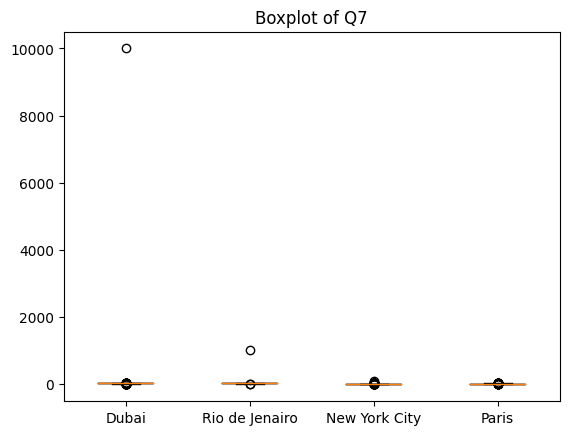

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


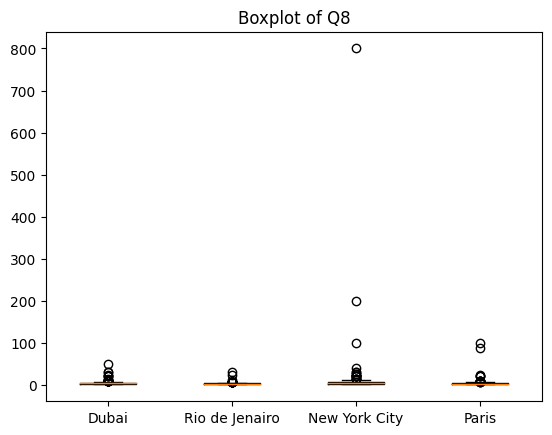

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


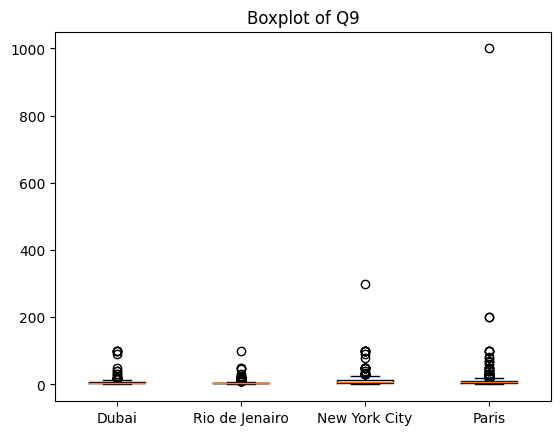

In [269]:
data = pd.read_csv("/content/drive/MyDrive/CSC311/clean_dataset.csv")

datalist = numpy.array(data)
data.describe()

# Datapoints with Dubai as the target
dubaiList = datalist[datalist[...,11] == 'Dubai']
# Datapoints with Rio de Janeiro as the target
rioList = datalist[datalist[...,11] == 'Rio de Janeiro']
# Datapoints with New York City as the target
nyList = datalist[datalist[...,11] == 'New York City']
# Datapoints with Paris as the target
parisList = datalist[datalist[...,11] == 'Paris']

# The number of rows should equal the sum of each sublist
print(datalist.shape)
print(len(dubaiList) + len(rioList) + len(nyList) + len(parisList))

question = 8
# Question 7
q7Dubai = numpy.array(dubaiList[..., question])
q7Rio = numpy.array(rioList[..., question])
q7Newyork = numpy.array(nyList[..., question])
q7Paris = numpy.array(parisList[..., question])

for q in [7, 8, 9]:
  question = q
  q7Dubai = numpy.array(dubaiList[..., question])
  q7Rio = numpy.array(rioList[..., question])
  q7Newyork = numpy.array(nyList[..., question])
  q7Paris = numpy.array(parisList[..., question])

  for i in range(0, len(q7Dubai)):
      # A few of the data points are floats and contain commas. So:
      # convert to string -> replace comma -> convert to float
      # For Dubai
      coverted = float(str(q7Dubai[i]).replace(',', ''))
      q7Dubai[i] = float(str(q7Dubai[i]).replace(',', ''))

      # For Rio
      coverted = float(str(q7Rio[i]).replace(',', ''))
      q7Rio[i] = float(str(q7Rio[i]).replace(',', ''))

      # For New York
      coverted = float(str(q7Newyork[i]).replace(',', ''))
      q7Newyork[i] = float(str(q7Newyork[i]).replace(',', ''))

      # For Paris
      coverted = float(str(q7Paris[i]).replace(',', ''))
      q7Paris[i] = float(str(q7Paris[i]).replace(',', ''))


  q7All = [q7Dubai, q7Rio, q7Newyork, q7Paris]
  plt.figure()
  plt.title(f"Boxplot of Q{question}")
  plt.boxplot(q7All, labels=['Dubai', 'Rio de Jenairo', 'New York City', 'Paris'])
  plt.show()

In [252]:
# @title Cleaning data

debug = False  # set to True to print all the invalid data before deletion
refine = False  # set to True to delete the outliers

q6_numerical = [[], [], [], [], [], []]
for i in range(len(data['id'])):
  if len(data['Q6'][i]) != len("Skyscrapers=>6,Sport=>1,Art and Music=>3,Carnival=>3,Cuisine=>3,Economic=>3"):
    if debug: print(data['Q6'][i])
    for j in range(6): q6_numerical[j].append(-1)
  else:
    for j in [13, 22, 39, 51, 62, 74]: q6_numerical[j//11 - 1].append(int(data['Q6'][i][j]))

data_fets = numpy.stack([
    data['Q1'], data['Q2'], data['Q3'], data['Q4'],
    # Q5 break down into indicator feature
    [int('Partner' in str(x)) for x in data['Q5']],
    [int('Friends' in str(x)) for x in data['Q5']],
    [int('Siblings' in str(x)) for x in data['Q5']],
    [int('Co-worker' in str(x)) for x in data['Q5']],
    q6_numerical[0], q6_numerical[1], q6_numerical[2], q6_numerical[3], q6_numerical[4], q6_numerical[5],
    data['Q7'], data['Q8'], data['Q9'], data['Q10']
], axis = 1)

target = numpy.stack([data['Label']], axis = 1)

print(data_fets.shape)
print(target.shape)


# Cleaning step 1: remove the response with format error
def valid_data(v) -> bool:
  # Q1 - Q4
  for i in [0, 1, 2, 3]:
    if v[i] not in [1, 2, 3, 4, 5]:
      if debug: print(f"Can't process Q{i+1}: {v}")
      return False
  # Q5
  if (v[4] + v[5] + v[6] + v[7]) == 0:
    if debug: print(f"Can't process Q5: {v}")
    return False
  # Q6
  for i in [8, 9, 10, 11, 12, 13]:
    if v[i] not in [1, 2, 3, 4, 5, 6]:
      if debug: print(f"Can't process Q6: {v}")
      return False
  # Q7 - Q9
  for i in [14, 15, 16]:
    try:
      if numpy.isnan(float(v[i])):
        if debug: print(f"Can't process Q{i-7}: {v}")
        return False
    except:
      if debug: print(f"Can't process Q{i-7}: {v}")
      return False
  return True

step1_invalid = 0
i = 0
if debug: print(".                  Q1. Q2. Q3. Q4. Q5.     Q6.         Q7-9")
while i < len(data_fets):
  if not valid_data(data_fets[i]):
    # if debug: print(f"{target[i][0]}: {data_fets[i]}")
    data_fets = numpy.delete(data_fets, (i), axis=0)
    target = numpy.delete(target, (i), axis = 0)
    step1_invalid += 1
    continue
  i += 1

# just for double check...
for i in range(len(data_fets)):
  if not valid_data(data_fets[i]): print("ERROR!!")
  for j in [14, 15, 16]:
    data_fets[i][j] = float(data_fets[i][j])


print(f"----------\nThere are {step1_invalid} response with format error")
print(data_fets.shape)
print(target.shape)

# Cleaning step 2: remove the outliers from Q7 - Q9
def q789_outliers(data_fets, threshold):
  q7_mean, q7_std = numpy.mean(data_fets[:,14]), numpy.std(data_fets[:,14])
  q8_mean, q8_std = numpy.mean(data_fets[:,15]), numpy.std(data_fets[:,15])
  q9_mean, q9_std = numpy.mean(data_fets[:,16]), numpy.std(data_fets[:,16])

  q7_lower, q7_upper = ((-threshold) * q7_std + q7_mean), (threshold * q7_std + q7_mean)
  q8_lower, q8_upper = ((-threshold) * q8_std + q8_mean), (threshold * q8_std + q8_mean)
  q9_lower, q9_upper = ((-threshold) * q9_std + q9_mean), (threshold * q9_std + q9_mean)

  print(f"Q7: {round(q7_lower, 4)} < x < {round(q7_upper, 4)}")
  print(f"Q8: {round(q8_lower, 4)} < x < {round(q8_upper, 4)}")
  print(f"Q9: {round(q9_lower, 4)} < x < {round(q9_upper, 4)}")

def refine_data(v):
  if not (-50 <= float(v[14]) <= 50): return False
  if not (0 < float(v[15]) < 50): return False
  if not (0 < float(v[16]) < 50): return False
  # refine q6
  # if not (2.5 <= sum([v[i] for i in range (8, 14)])/6 <= 4.5): return False
  return True

q789_outliers(data_fets, 3)

if refine:
  step2_invalid = 0
  i = 0

  while i < len(data_fets):
    if not refine_data(data_fets[i]):
      if debug: print(f"{target[i][0]}: {data_fets[i]}")
      data_fets = numpy.delete(data_fets, (i), axis=0)
      target = numpy.delete(target, (i), axis = 0)
      step2_invalid += 1
      continue
    i += 1

  print(f"----------\nThere are {step2_invalid} response with outlier values")
  print(data_fets.shape)
  print(target.shape)

  q789_outliers(data_fets, 3)


print()

(1468, 18)
(1468, 1)
----------
There are 14 response with format error
(1454, 18)
(1454, 1)
Q7: -21.0988 < x < 49.6057
Q8: -61.7606 < x < 71.3617
Q9: -40.8273 < x < 59.5838



In [253]:
# @title Training preparation

include_q1 = True
include_q2 = True
include_q3 = True
include_q4 = True
include_q5 = True
include_q6 = True
include_q7 = True
include_q8 = True
include_q9 = True
include_q10 = False

normalize_q6 = True

# normalizing q6 data
if normalize_q6:
  q6_np = numpy.stack([data_fets[:,x] for x in range(8, 14)]).T
  q6_mean = numpy.mean(q6_np, axis = 1)
  q6_mean_offset = 3.5/q6_mean
  q6_normalized = q6_np * q6_mean_offset.reshape(-1, 1)

feature_names = []
final_data = numpy.empty([len(data_fets),0])

if include_q1:
  final_data = numpy.append(final_data, numpy.array([data_fets[:,0]]).T, axis = 1)
  feature_names.append("Q1")
if include_q2:
  final_data = numpy.append(final_data, numpy.array([data_fets[:,1]]).T, axis = 1)
  feature_names.append("Q2")
if include_q3:
  final_data = numpy.append(final_data, numpy.array([data_fets[:,2]]).T, axis = 1)
  feature_names.append("Q3")
if include_q4:
  final_data = numpy.append(final_data, numpy.array([data_fets[:,3]]).T, axis = 1)
  feature_names.append("Q4")
if include_q5:
  for i in range(4, 8): final_data = numpy.append(final_data, numpy.array([data_fets[:,i]]).T, axis = 1)
  feature_names.extend(["Q5_partner", "Q5_friends", "Q5_siblings", "Q5_coworker"])
if include_q6:
  if normalize_q6:
    for i in range(6): final_data = numpy.append(final_data, numpy.array([q6_normalized[:,i]]).T, axis = 1)
  else:
    for i in range(8, 14): final_data = numpy.append(final_data, numpy.array([data_fets[:,i]]).T, axis = 1)
  feature_names.extend(["Q6_skycrapers1", "Q6_sport1", "Q6_artmusic1", "Q6_carnival1", "Q6_cuisine1", "Q6_economics1"])
if include_q7:
  final_data = numpy.append(final_data, numpy.array([data_fets[:,14]]).T, axis = 1)
  feature_names.append("Q7")
if include_q8:
  final_data = numpy.append(final_data, numpy.array([data_fets[:,15]]).T, axis = 1)
  feature_names.append("Q8")
if include_q9:
  final_data = numpy.append(final_data, numpy.array([data_fets[:,16]]).T, axis = 1)
  feature_names.append("Q9")
if include_q10:
  final_data = numpy.append(final_data, numpy.array([data_fets[:,17]]).T, axis = 1)
  feature_names.append("Q10")

from sklearn.model_selection import train_test_split

X = final_data
t = target

# 80% training, 15% validation, 5% test
X_tv, X_test, t_tv, t_test = train_test_split(X,t, test_size = 0.05, random_state = 1)
X_train, X_valid, t_train, t_valid = train_test_split(X_tv, t_tv, test_size = 15/95, random_state = 1)

# Convert the target vector to a N x 4 matrix where each data point is a one hot vector
# For the Training Set
t_train_vector = numpy.zeros((t_train.shape[0], 4) )
for i in range(0, t_train.shape[0]):
    if t_train[i] == "Dubai":
        t_train_vector[i] = numpy.array([1,0,0,0])
    elif t_train[i] == "Rio de Janeiro":
      t_train_vector[i] = numpy.array([0,1,0,0])
    elif t_train[i] == "New York City":
       t_train_vector[i] = numpy.array([0,0,1,0])
    else:
      t_train_vector[i] = numpy.array([0,0,0,1])
# For the Validation Set
t_valid_vector = numpy.zeros((t_valid.shape[0], 4) )
for i in range(0, t_valid.shape[0]):
    if t_valid[i] == "Dubai":
        t_valid_vector[i] = numpy.array([1,0,0,0])
    elif t_valid[i] == "Rio de Janeiro":
      t_valid_vector[i] = numpy.array([0,1,0,0])
    elif t_valid[i] == "New York City":
       t_valid_vector[i] = numpy.array([0,0,1,0])
    else:
      t_valid_vector[i] = numpy.array([0,0,0,1])

# For the Test Set
t_test_vector = numpy.zeros((t_test.shape[0], 4) )
for i in range(0, t_test.shape[0]):
    if t_test[i] == "Dubai":
        t_test_vector[i] = numpy.array([1,0,0,0])
    elif t_test[i] == "Rio de Janeiro":
      t_test_vector[i] = numpy.array([0,1,0,0])
    elif t_test[i] == "New York City":
       t_test_vector[i] = numpy.array([0,0,1,0])
    else:
      t_test_vector[i] = numpy.array([0,0,0,1])


# Logistic Regressions Model using Sklearn

In [254]:
from sklearn.linear_model import LogisticRegression


# ######################### Q1-Q9 Results
lr = LogisticRegression(multi_class="multinomial", fit_intercept=False)
lr.fit(X_train, t_train)

print("------------ Results using Q1 - Q9 ------------ ")
print(f"Training accuracy: {lr.score(X_train, t_train)}")
print(f"Validation accuracy: {lr.score(X_valid, t_valid)}")
print(f"Test accuracy: {lr.score(X_test, t_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------ Results using Q1 - Q9 ------------ 
Training accuracy: 0.9070567986230637
Validation accuracy: 0.8447488584474886
Test accuracy: 0.8767123287671232


Weights for each feature found in the above Sklearn LR Model.

# Logistic Regression Model from Scratch

Setting up the data to use for the model. Here the target is coverted from a string to a one hot vector indicating which class the example belongs to. The encodings are:
  - Dubai => [1 0 0 0]
  - Rio De Jenairo => [0 1 0 0]
  - New York City => [0 0 1 0]
  - Paris => [0 0 0 1]

In [266]:
def softmax(z):
    """
    Compute the softmax of vector z, or row-wise for a matrix z.

    Parameters:
        `z` - a numpy array of shape (4,) or (N, 4)

    Returns: a numpy array with the same shape as `z`, with the softmax
        activation applied to each row of `z`
    """
    # Take the exponent of z
    expZ = numpy.atleast_2d(numpy.exp(z.astype(float)))

    # The sum over all elements in z and convert to a matrix
    extendedSum = [numpy.sum(expZ, axis=1) for i in range(numpy.atleast_2d(z).shape[1])]
    extendedSum = numpy.stack(extendedSum, axis=1)

    return expZ / extendedSum

def LR_predictOneHot(w, X):
    """
    Computes the prediction made by a logistic regression model with weights `w`
    with input data matrix `X`.

    Parameters:
        `w` - a numpy array of shape (D+1)
        `X` - data matrix of shape (N, D+1)

    Returns: Prediction vector `y` of shape (N, 4). This is a one hot vector
             which indiciates which city the example corresponds to
    """
    z = numpy.matmul(X, w)
    smax = softmax(z)

    # Find the indices with the larges logit
    y = numpy.argmax(smax, axis=1)

    result = []
    for i in range(len(y)):
        if y[i] == 0: result.append([1,0,0,0]) # Dubai
        elif y[i] == 1: result.append([0,1,0,0]) # Rio
        elif y[i] == 2: result.append([0,0,1,0]) # New York
        else: result.append([0,0,0,1]) # Paris

    return numpy.stack(result, axis=0)


def loss(w, X, t):
    """
    Computes the average cross-entropy loss of a logistic regression model
    with weights `w` with input data matrix `X` and
    targets `t`.

    Parameters:
        `w` - a numpy array of shape (D+1)
        `X` - data matrix of shape (N, D+1)
        `t` - target vector of shape (N)

    Returns: a scalar cross entropy loss value
    """
    N = X.shape[0]
    z = numpy.matmul(X, w)
    y = softmax(z)
    logy = numpy.atleast_2d(numpy.log(y))

    # To prevent numpy from changing t = (1, N) to (N,)
    t = numpy.atleast_2d(t)

    tlogy = numpy.matmul(t.T, logy)
    sumTY = numpy.sum(tlogy)
    sumTY = -1*sumTY/N
    return sumTY


def accuracy(w, X, t, thres=0.5):
    """
    Compute the accuracy of a logistic regression model with weights `w`
    on the data set with input data matrix `X` and targets `t`

    The output pred

    Parameters:
        `w` - a numpy array of shape (D+1)
        `X` - data matrix of shape (N, D+1)
        `t` - target vector of shape (N)
        `thres` - a value between 0 and 1

    Returns: accuracy value, between 0 and 1
    """

    N = X.shape[0]
    y = LR_predictOneHot(w, X)

    # Get the value that contain the correct prediction. The matrix contains
    # only zeros and ones.
    predictions = y[y == t]
    return numpy.sum(predictions)/N


def grad(w, X, t):
    '''
    Return the gradient of the cost function at `w` using data set 'X' and target
    vector 't'. This uses the average cross entropy loss for multiple classes.
    Parameters:
        `w` - D x K: The starting value for the weights
        `X` - N x D: the input values
        `t` - N x 4: the target one hot vectors

    Returns: gradient vector of shape D x K
    '''
    # Number of examples
    N = X.shape[0]

    # (y - t)
    smax = softmax(numpy.matmul(X, w)) - t
    result = (1/N)*numpy.matmul(X.T, smax)
    return result

Using gradient descent to tune the weights

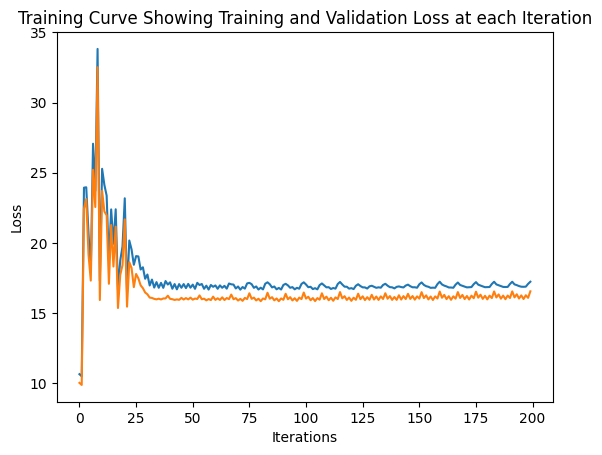

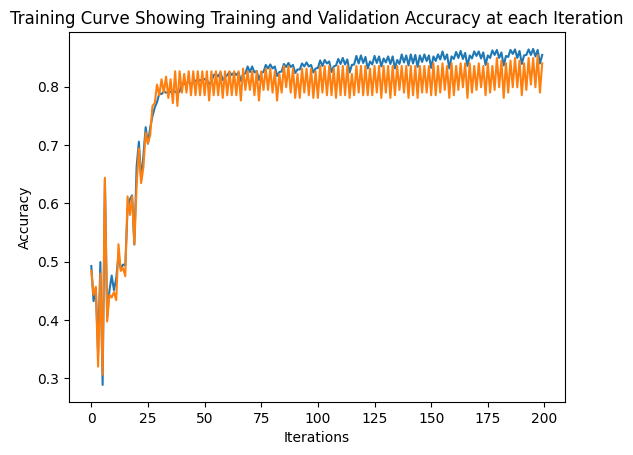

Final Training Loss: 17.233682867439374
Final Validation Loss: 16.549435476107295
Final Training Accuracy: 0.8545611015490534
Final Validation Accuracy: 0.8401826484018264
Weights Shape: (17, 4)
Weights: [[-0.1406721916530633 -0.28007840797865163 0.22737776486946917
  0.19337283476224612]
 [0.02761744155993627 -0.2304056418340549 0.45444248829518813
  -0.25165428802106876]
 [0.2590054908285079 -0.2345282473634788 -0.4051641510256163
  0.38068690756058665]
 [-0.2929307376120877 0.42117252977314323 0.05140052275006079
  -0.1796423149111164]
 [-0.0496958680674129 -0.03095873030538791 -0.07554199179509558
  0.15619659016789636]
 [0.06663607916792792 0.031141881454538757 0.08882673249383964
  -0.18660469311630645]
 [-0.06045337382860005 0.014121049379018834 0.13575377979482017
  -0.08942145534523906]
 [-0.09210119699788706 -0.04623438292438502 0.2726435581930217
  -0.13430797827074947]
 [0.40759803248696896 -0.48499956471640787 0.309057671907681
  -0.2316561396782425]
 [-0.07329595605102866

In [274]:
def solve_via_gradient_descent(alpha=0.00005, niter=1000,
                               X_t=X_train, t_t=t_train_vector,
                               X_v=X_valid, t_v=t_valid_vector,
                               w_init=None, plot=True):
    '''
    Parameters:
          `alpha` - the learning rate
          `niter` - the number of iterations of gradient descent to run
          `X_train` - the data matrix to use for training
          `t_train` - the target vector to use for training
          `X_valid` - the data matrix to use for validation
          `t_valid` - the target vector to use for validation
          `w_init` - the initial `w` vector (if `None`, use a vector of all zeros)
          `plot` - whether to track statistics and plot the training curve

    Solves for logistic regression weights via full batch gradient descent.
    Return weights after `niter` iterations.
    '''
    # initialize all the weights to zeros
    w = numpy.zeros((X_t.shape[1], 4))

    # To track the loss and accuracies
    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []

    for it in range(niter):

        # Compute the gradient
        dw = grad(w, X_t, t_t)
        w = w - alpha * dw

        if plot:
            # Record the current training and validation loss values.
            train_loss.append(loss(w, X_t, t_t))
            valid_loss.append(loss(w, X_v, t_v))
            train_acc.append(accuracy(w, X_t, t_t))
            valid_acc.append(accuracy(w, X_v, t_v))
    if plot:
        plt.title("Training Curve Showing Training and Validation Loss at each Iteration")
        plt.plot(train_loss, label="Training Loss")
        plt.plot(valid_loss, label="Validation Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()

        plt.title("Training Curve Showing Training and Validation Accuracy at each Iteration")
        plt.plot(train_acc, label="Training Accuracy")
        plt.plot(valid_acc, label="Validation Accuracy")
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.show()

        print("Final Training Loss:", train_loss[-1])
        print("Final Validation Loss:", valid_loss[-1])
        print("Final Training Accuracy:", train_acc[-1])
        print("Final Validation Accuracy:", valid_acc[-1])
    return w


weights = solve_via_gradient_descent(alpha=0.05, niter=200, t_t=t_train_vector, t_v=t_valid_vector)
print("Weights Shape: " + str(weights.shape))
print("Weights: " + str(weights))


def LR_predict(X):
  '''
  Given an input vector X, output the prediction using the LR model.
  The output is a string that reflects one of the 4 cities:
      Dubai, Rio de Janeiro, New York City, Paris
  '''
  # Weights given after 1000 iterations
  weights = numpy.array([[
    [-0.34383155469422616, -0.5409998755806328, 0.5263324579346319, 0.35849897234022754],
    [0.15950615543468558, -0.5251018835479264, 0.7668996032447084,-0.40130387513146665],
    [0.4061685955782517, -0.2543586694431776, -0.6469891049672775, 0.49517917883220425],
    [-0.4816778446723145, 0.8532660773455399, -0.07376967516063666, -0.29781855751258784],
    [-0.13918438474169323, -0.07614875212005219, -0.17573065111023237, 0.3910637879719767],
    [0.27247411773715413, 0.09253486406112132, 0.17967905160904232, -0.5446880334073185],
    [-0.2104945751826607, 0.060687273172202356, 0.40461370454317264, -0.2548064025327149],
    [-0.30659583929986445, -0.15200898148941686, 0.7597255505498839, -0.3011207297606025],
    [0.44726559965432505, -0.39296694788422487, 0.16915130262940115, -0.22344995439950352],
    [0.010938282702750164, 0.3007157955964715, -0.3113264955561139, -0.00032758274310834903],
    [-0.3702319779521466, 0.01488493614846928, -0.10472926169817627, 0.4600763035018529],
    [-0.09647410798732925, 0.4450506192378965, -0.23423243984325295, -0.1143440714073151],
    [-0.11070475560672022, -0.16339400117809952, -0.22920965899621956, 0.5033084157810396],
    [0.09467671479245009, -0.13340932971982078, 0.30640449298742445, -0.2676718780600544],
    [0.14239600237650715, 0.12042405712233752, -0.17119776539771764, -0.09162229410112353],
    [0.03421358990563432, -0.08905394345187687, 0.03258963485308329, 0.02225071869315995],
    [0.017444714533841322, -0.012755066681495975, -0.034179112790505825, 0.029489464938163873],
          ]])
  cities = {0:'Dubai',
            1:'Rio de Janeiro',
            2:'New York City',
            3:'Paris'}

  prediction = LR_predictOneHot(weights, X)[0].astype(float)
  city = numpy.argmax(prediction)

  return cities[city]

c, t = 0, 0
for i in range(len(X_test)):
  t += 1
  if LR_predict(X_test[i]) == t_test[i][0]:
      c+=1

print(f"Test Accuracy: {c/t}")
